<h3> IBM Data Science Capstone Project</h3>
<h1> How Hip are Brooklyn Neighborhoods? </h1>

<h2>Introduction</h2>
<br>
Brooklyn NY is notoriously (obnoxiously) hip—known for hot Yoga studios, elusive speakeasies and overpriced coffee. But Brooklyn is a big place with a myriad of different neighborhoods. For this project, I am exploring how we can use data to identify which neighborhoods in Brooklyn offer the highest number of Hipster-amenities. The output from this project could be used by prospective renters looking for an archetypical Brooklyn experience, or real estate agents hoping to most effectively promote properties in these areas. Personally, as a hipster who has lived in Brooklyn for the past 7 years, I want to use data to see if I can validate some existing stereotypes and understand, empirically, which neighborhoods are the hippest in Brooklyn.

<h2>Data Sources</h2>
<br>
To undertake this momentous investigation I will need to leverage two main data sources:

1. NYC Neighborhood Data. 'newyork_data.json' provides a comprehensive list of neighborhoods in New York that includes their Boroughs and Latitude and Longitude.
2. The Foursquare API. I can pull information about adjacent venues from 'api.foursquare.com'. 

In [134]:
#imports
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.cm as cm
import matplotlib.colors as colors

#Seaborn
import seaborn as sns

! pip install folium==0.5.0
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<h3>Brooklyn Neighborhood Data</h3>

In [135]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [136]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [137]:
#drop Boroughs other than Brooklyn
bk_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
bk_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [138]:
address = 'Brooklyn, NY'
latitude = 40.668104
longitude = -73.980582

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(bk_data['Latitude'], bk_data['Longitude'], bk_data['Borough'], bk_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

<h3>Data from Foursquare</h3>

In [139]:
#Define Foursquare Credentials and Version
CLIENT_ID = '41J2SNTAYQL30FC3XWZ4SSZAF3VRHC55DQKVTNOHB4FG1VSR' # your Foursquare ID
CLIENT_SECRET = 'LMSIOU3WPLWG4BR0DTUTTRE3MWDTZTPUMS0EZYD4OOG0ZOYJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 41J2SNTAYQL30FC3XWZ4SSZAF3VRHC55DQKVTNOHB4FG1VSR
CLIENT_SECRET:LMSIOU3WPLWG4BR0DTUTTRE3MWDTZTPUMS0EZYD4OOG0ZOYJ


In [140]:
neighborhood_latitude = bk_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bk_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = bk_data.loc[0, 'Neighborhood'] # neighborhood name

In [141]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [142]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6018752c4c547e3804a8c44f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Bay Ridge',
  'headerFullLocation': 'Bay Ridge, Brooklyn',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 81,
  'suggestedBounds': {'ne': {'lat': 40.63030106951066,
    'lng': -74.02470273356597},
   'sw': {'lat': 40.62130106051065, 'lng': -74.03653865351028}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b895827f964a5206c2d32e3',
       'name': 'Pilo Arts Day Spa and Salon',
       'location': {'address': '8412 3rd Ave',
        'lat': 40.62474788273414,
        'lng': -74.03059056940135,
        'labeledLatL

In [143]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [144]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Pilo Arts Day Spa and Salon,Spa,40.624748,-74.030591
1,Bagel Boy,Bagel Shop,40.627896,-74.029335
2,Cocoa Grinder,Juice Bar,40.623967,-74.030863
3,Leo's Casa Calamari,Pizza Place,40.624200,-74.030931
4,Pegasus Cafe,Breakfast Spot,40.623168,-74.031186


<br>
<br>
<h2>Methodologies</h2>
<br>
Now that data from Foursquare and our NYC database has been imported and cleaned up, we can start to do some exploratory analysis. First I create a function that will use the Foursquare API to identify how many venues are near each neighborhood's designated lat/long position.

In [145]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<br>
And I run that function on all our Brooklyn neighborhoods originally from our NYC data.

In [146]:
bk_venues = getNearbyVenues(names=bk_data['Neighborhood'],
                                   latitudes=bk_data['Latitude'],
                                   longitudes=bk_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


<br>
I then create a dataframe counting the number of venues in each neighborhood per Venue Category (e.g. Bank, Coffee Shop, Library, etc...). TO understand which neighborhoods have the most venues overall, I add a 'TOTAL VENUES' column to this dataframe that aggregates across venue categories.

In [147]:
# one hot encoding
bk_onehot = pd.get_dummies(bk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bk_onehot['Neighborhood'] = bk_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bk_onehot.columns[-1]] + list(bk_onehot.columns[:-1])
bk_onehot = bk_onehot[fixed_columns]

#Cluster venues by Sum to calculate totals
bk_grouped = bk_onehot.groupby('Neighborhood').sum().reset_index()
bk_grouped['TOTAL VENUES'] = bk_grouped.sum(axis=1)
bk_grouped.head(10)

,Neighborhood,Yoga Studio,Accessories Store,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Gym,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Tr

<br>
To understand which neighborhoods are particularly hip, I need to differentiate between standard venues and venues that appeal to hipsters. I create a new dataframe that only includes hipster venues (e.g. Yoga Studios, Cafes, Indy Movie Theaters, and Speakeasies). While this list is not comprehensive, it represents some of the highest hipster priorities. Further research into hipster culture could and should be completed in order to make this list as representative as possible.

In [148]:
#Create a Dataframe just looking hip venues like cafes and speakeasys
hipster_stuff = ['Neighborhood', 'Yoga Studio', 'Boutique', 'Brewery', 'Café', 'Cocktail Bar', 'Coffee Shop', 'Farmers Market', "Indie Movie Theater", 'Speakeasy', 'Used Bookstore']
bk_hip = bk_grouped.drop(bk_grouped.columns.difference(hipster_stuff), 1)

#Rank neighborhoods by their total number of hip venues
bk_hip['TOTAL HIP'] = bk_hip.sum(axis=1)
bk_hip.sort_values(by=['TOTAL HIP'], ascending=False, inplace=True)
hip_top_10 = bk_hip.head(10)
bk_hip.head(12)

,Neighborhood,Yoga Studio,Boutique,Brewery,Café,Cocktail Bar,Coffee Shop,Farmers Market,Indie Movie Theater,Speakeasy,Used Bookstore,TOTAL HIP
49,North Side,4,1,0,0,2,11,0,0,0,0,18
37,Greenpoint,3,1,0,2,5,6,0,0,0,0,17
16,Cobble Hill,3,1,0,0,4,4,0,1,1,0,14
13,Carroll Gardens,0,0,0,0,4,7,1,1,0,0,13
30,Fort Greene,2,1,0,1,2,2,2,1,0,0,11
5,Boerum Hill,2,0,0,1,2,6,0,0,0,0,11
54,Prospect Heights,1,0,1,2,3,3,1,0,0,0,11
62,South Side,3,0,0,0,2,6,0,0,0,0,11
9,Brooklyn Heights,4,1,0,1,0,3,1,0,0,0,10
21,Downtown,1,0,1,1,1,5,0,0,0,0,9


<br>
While some neighborhoods have a high number of Hipster venues, this could be the result of simply having a larger number of total venues. A quick regression plot shows which neighborhoods have a disproportionate number of hipster venues compared to the average. As you can see, neighborhoods like Bay Ridge and even Downtown Brooklyn have many venues that are not hip. Whereas neighborhoods like Greenpoint, Northside and Bed Stuy have a high number of hipster venues compared to their total number of venues. This might indicate that Downtown Brooklyn's hip-ness might be diluted with non-hip amenities, while Greenpoint is dense with venues that would appeal to hipsters.

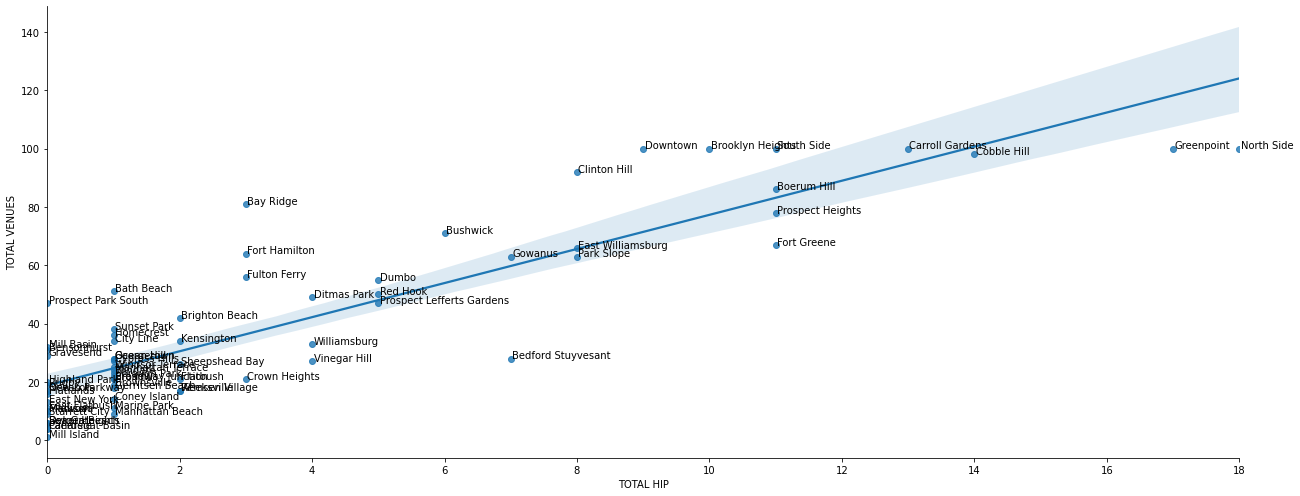

In [149]:
#Create regression line to look at correlation between total venues and hip venues
compare = pd.concat([bk_grouped[['Neighborhood']],bk_hip[['TOTAL HIP']], bk_grouped[['TOTAL VENUES']]], axis=1)

sns.lmplot(x='TOTAL HIP',y='TOTAL VENUES',data=compare, height = 7,
           aspect =2.5, fit_reg=True) 

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(compare['TOTAL HIP'], compare['TOTAL VENUES'], compare.Neighborhood, plt.gca())


<br>
Next, by ordering the neighborhoods by the value of their total number of hip venues, I create a list of 10 neighborhoods that offer the highest number of hipster amenities in Brooklyn. A simple stacked bar chart shows the breakdown of those hipster amenieis across those 10 nighborhoods to give a better idea of how these top 10 neighborhoods compare and what each neighborhood has to offer.

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


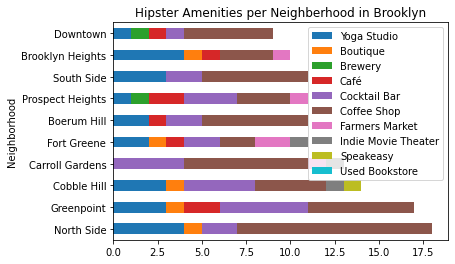

In [150]:
#Graphing the Top 10 Neighborhoods with Hipster Amenities in Brooklyn
hip_top_10.drop(hip_top_10.columns.difference(hipster_stuff), 1, inplace=True)
hip_top_10.set_index('Neighborhood', inplace=True)
hip_top_10.plot.barh(stacked=True, title = 'Hipster Amenities per Neighberhood in Brooklyn')

<br>
I merge the Hip total and overall venue total back into the dataframe which includes each neighborhood's lat/long in order to create a final map with folium which visualizes the total number of venues in each neighborhood and highlights the total number of hip venues through a color gradient. 

In [121]:
#Create a dataframe combining neighborhood locations and venue information
bk_merged = bk_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
bk_merged = bk_merged.join(compare.set_index('Neighborhood'), on='Neighborhood')

bk_merged.head()

,Borough,Neighborhood,Latitude,Longitude,TOTAL HIP,TOTAL VENUES
0,Brooklyn,Bay Ridge,40.625801,-74.030621,3,81
1,Brooklyn,Bensonhurst,40.611009,-73.995180,0,31
2,Brooklyn,Sunset Park,40.645103,-74.010316,1,38
3,Brooklyn,Greenpoint,40.730201,-73.954241,17,100
4,Brooklyn,Gravesend,40.595260,-73.973471,0,29


In [122]:
#Use describe to get the median
bk_merged.describe()

,Latitude,Longitude,TOTAL HIP,TOTAL VENUES
count,70.000000,70.000000,70.000000,70.00000
mean,40.651089,-73.952999,3.400000,38.70000
std,0.039512,0.039396,4.440916,29.59502
min,40.574293,-74.031979,0.000000,1.00000
25%,40.616786,-73.982877,0.000000,17.00000
50%,40.653845,-73.957798,1.000000,28.00000
75%,40.681634,-73.927440,5.000000,55.75000
max,40.730201,-73.867976,18.000000,100.00000


In [130]:
#Create a final map showing number of hip venues
map_hip_score = folium.Map(location=[latitude, longitude], zoom_start=12)

#find color value
def spectrum (c):
    if (c > 0) and (c <=1):#bottom middle 25%
        s = "lightblue"
    elif (c > 1) and (c <=5):#top middle 25%
        s = "cadetblue"
    elif (c > 5) and (c <=10):#top 25%
        s = "blue"
    elif (c > 10):#Upper outliers%
        s = "darkblue"
    else: #bottom 25%
        s = "white"
    return (s)

# add markers to map
for lat, lng, borough, neighborhood, hip, total in zip(bk_merged['Latitude'], bk_merged['Longitude'], bk_merged['Borough'], bk_merged['Neighborhood'], bk_merged['TOTAL HIP'], bk_merged['TOTAL VENUES']):
    label = '{} hip spots out of {} total venues in {}'.format(hip, total, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=(total/6),
        popup=label,
        color='white',
        fill=True,
        fill_color=spectrum(hip),
        fill_opacity=0.6).add_to(map_hip_score) 
    
map_hip_score

<br>
<br>
<h2>Results</h2>
<br>
Immediately, the map makes it clear that the "hip" parts of Brooklyn are actually quite clustered immediately adjacent to Manhattan. The majority of Brooklyn neighborhoods do not actually offer a significant number of hipster amenities. From the raw ranking, we can callout the following neighborhoods as possessing a high number of hipster venues:

1. North Side (Williamsburg)
2. Greenpoint
3. Cobble Hill
4. Carroll Gardens
5. Fort Greene
6. Boerum Hill
7. Prospect Heights
8. South Side (Williamsburg)
9. Brooklyn Heights
10. Downtown Brooklyn


<h2>Conclusion</h2>
<br>
Looking at our regression line, however, we might exclude Downtown Brooklyn, Brooklyn Heights and South Side Williamsburg from this list as their ratio of hip venues to total venues is not as favorable as the other neighborhoods on our top 10 list. For those interested in moving to particularly hip parts of Brooklyn, our data would indicate that North Side Williamsburg or Greenpoint might be your best option, followed by Cobble Hill, Carroll Gardens, Fort Greene, Boerum Hill and even Prospect Heights.

While this analysis is cousory and (obviously) a bit tongue-in-cheek, it could be interesting and genuinely valuable to overlay this type of data with average costs of apartments in the area to get an understanding of which hip areas are most affordable. When analyzed over time, this type of analysis could also reveal how hipster-influence impacts gentrification. 

Thanks for your time and I hope you enjoyed this data project. 
